<a href="https://colab.research.google.com/github/adnanabbasshah/Animated-Wind-Map-using-R/blob/main/data_processing_and_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U gdown

# Download the folder using gdown
!gdown --folder https://drive.google.com/drive/folders/18jfbo2AHBSSOm_XEjg4Wq_D7T1y6VmEE?usp=sharing


Retrieving folder contents
Retrieving folder 1rlmFgYEtUcaPQVXMuze_XKdwYuR2Ox72 project
Processing file 1nCNf23pMFVq9CvPjGs_gw-0FwKqJaPk1 data processing and viz.ipynb
Processing file 1-_FZlMkeezwBUj5ojg2YtC40B62FqAq8 initial processing (data Extraction).R
Retrieving folder 1m7xTIJZ1usjwJ15yZyGy7gzsRKzfUhp8 files
Processing file 1IXqza7D0mSsum5wlEbPJwdCWxIUNTd_8 cleared_quantities.parquet
Processing file 1xtgXqt9uO1R-JfbDY1UchfFaumpMaC50 merged_energy_bids.parquet
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nCNf23pMFVq9CvPjGs_gw-0FwKqJaPk1
To: /content/energycontrol/project/data processing and viz.ipynb
100% 112k/112k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-_FZlMkeezwBUj5ojg2YtC40B62FqAq8
To: /content/energycontrol/project/initial processing (data Extraction).R
100% 3.99k/3.99k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.go

In [3]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.5 MB/s eta 0:00:00


In [7]:
import pandas as pd

bids = pd.read_parquet("/content/energycontrol/project/files/merged_energy_bids.parquet", engine='fastparquet')
cleared = pd.read_parquet("/content/energycontrol/project/files/cleared_quantities.parquet", engine='fastparquet')

bids['dispatchInterval'] = pd.to_datetime(bids['dispatchInterval'])
cleared['dispatchInterval'] = pd.to_datetime(cleared['dispatchInterval'])

bids_unique = bids.drop_duplicates(subset=["dispatchInterval", "facilityCode"])
cleared_unique = cleared.drop_duplicates(subset=["dispatchInterval", "facilityCode"])

merged = pd.merge(
    bids_unique,
    cleared_unique,
    on=["dispatchInterval", "facilityCode"],
    how="inner"
)

print("Merged rows:", len(merged))
print(merged.head())


Merged rows: 40896
           dispatchInterval    facilityCode  quantity  submittedPrice  \
0 2024-12-29 08:00:00+08:00       ALCOA_WGP      0.00         -987.10   
1 2024-12-29 08:00:00+08:00  AMBRISOLAR_PV1      0.96        -1075.91   
2 2024-12-29 08:00:00+08:00  BREMER_BAY_WF1      0.60        -1372.04   
3 2024-12-29 08:00:00+08:00   COCKBURN_CCG1    240.00          101.55   
4 2024-12-29 08:00:00+08:00       COLLIE_G1    120.00         -971.90   

   lfaPrice        fuelType  clearedQuantity  
0  -1000.00      NON-LIQUID            0.000  
1  -1000.00         UNKNOWN            0.120  
2  -1000.00  NOT APPLICABLE            0.112  
3    101.71  NOT APPLICABLE            0.000  
4  -1000.00      NON-LIQUID          120.000  


In [8]:
import pandas as pd

def get_unique_intervals_per_day(df: pd.DataFrame, time_column: str) -> pd.Series:
    df[time_column] = pd.to_datetime(df[time_column])
    return df.groupby(df[time_column].dt.date)[time_column].nunique()

def get_unique_intervals_per_hour(df: pd.DataFrame, time_column: str) -> pd.Series:
    return df.groupby(df[time_column].dt.floor('H'))[time_column].nunique()

def main():
    df = cleared.copy()
    daily_counts = get_unique_intervals_per_day(df, 'dispatchInterval')
    hourly_counts = get_unique_intervals_per_hour(df, 'dispatchInterval')

    print("Unique 5-min intervals per day:")
    print(daily_counts)

    print("\nUnique 5-min intervals per hour:")
    print(hourly_counts.head(24))

    print("\nExpected 5-min intervals per day: 288")

if __name__ == "__main__":
    main()


/tmp/ipython-input-8-2766082070.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return df.groupby(df[time_column].dt.floor('H'))[time_column].nunique()


Unique 5-min intervals per day:
dispatchInterval
2024-12-28    192
2024-12-29    288
2024-12-30    288
2024-12-31    288
2025-01-01    119
2025-01-02    192
2025-01-03    288
2025-01-04    288
2025-01-05    119
Name: dispatchInterval, dtype: int64

Unique 5-min intervals per hour:
dispatchInterval
2024-12-28 08:00:00+08:00    12
2024-12-28 09:00:00+08:00    12
2024-12-28 10:00:00+08:00    12
2024-12-28 11:00:00+08:00    12
2024-12-28 12:00:00+08:00    12
2024-12-28 13:00:00+08:00    12
2024-12-28 14:00:00+08:00    12
2024-12-28 15:00:00+08:00    12
2024-12-28 16:00:00+08:00    12
2024-12-28 17:00:00+08:00    12
2024-12-28 18:00:00+08:00    12
2024-12-28 19:00:00+08:00    12
2024-12-28 20:00:00+08:00    12
2024-12-28 21:00:00+08:00    12
2024-12-28 22:00:00+08:00    12
2024-12-28 23:00:00+08:00    12
2024-12-29 00:00:00+08:00    12
2024-12-29 01:00:00+08:00    12
2024-12-29 02:00:00+08:00    12
2024-12-29 03:00:00+08:00    12
2024-12-29 04:00:00+08:00    12
2024-12-29 05:00:00+08:00    

In [13]:
import pandas as pd

# Assuming 'merged' is your merged DataFrame from previous step
merged = merged.copy()  # safe copy

# Calculate curtailment (MWh curtailed)
merged['curtailment'] = merged['quantity'] - merged['clearedQuantity']

# Extract hour from dispatchInterval (floor to hour)
merged['hour'] = merged['dispatchInterval'].dt.floor('H')

# Aggregate curtailment by hour (sum over all facilityCodes & 5-min intervals within hour)
hourly_curtailment = merged.groupby('hour')['curtailment'].sum().reset_index()

# Rename columns for clarity
hourly_curtailment.columns = ['hour', 'total_curtailment_MWh']

# Save to CSV
hourly_curtailment.to_csv('hourly_curtailment.csv', index=False)

print("✅ Hourly curtailment saved to 'hourly_curtailment.csv'")
print(hourly_curtailment.head(10))


✅ Hourly curtailment saved to 'hourly_curtailment.csv'
                       hour  total_curtailment_MWh
0 2024-12-28 08:00:00+08:00              23968.212
1 2024-12-28 09:00:00+08:00              28576.790
2 2024-12-28 10:00:00+08:00              29149.631
3 2024-12-28 11:00:00+08:00              26988.972
4 2024-12-28 12:00:00+08:00              25354.959
5 2024-12-28 13:00:00+08:00              22852.492
6 2024-12-28 14:00:00+08:00              18930.002
7 2024-12-28 15:00:00+08:00              17059.389
8 2024-12-28 16:00:00+08:00              14426.721
9 2024-12-28 17:00:00+08:00              12611.183


/tmp/ipython-input-13-2601614327.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged['hour'] = merged['dispatchInterval'].dt.floor('H')


In [14]:
import pandas as pd

# Assuming 'hourly_curtailment' dataframe with 'hour' and 'total_curtailment_MWh'

# Create full hourly ranges for all days between min and max hour
full_range = pd.date_range(start=hourly_curtailment['hour'].min(),
                           end=hourly_curtailment['hour'].max(),
                           freq='H', tz=hourly_curtailment['hour'].dt.tz)

# Reindex and fill missing with zero
hourly_curtailment_full = hourly_curtailment.set_index('hour').reindex(full_range, fill_value=0).rename_axis('hour').reset_index()

print(hourly_curtailment_full)


                        hour  total_curtailment_MWh
0  2024-12-28 08:00:00+08:00              23968.212
1  2024-12-28 09:00:00+08:00              28576.790
2  2024-12-28 10:00:00+08:00              29149.631
3  2024-12-28 11:00:00+08:00              26988.972
4  2024-12-28 12:00:00+08:00              25354.959
5  2024-12-28 13:00:00+08:00              22852.492
6  2024-12-28 14:00:00+08:00              18930.002
7  2024-12-28 15:00:00+08:00              17059.389
8  2024-12-28 16:00:00+08:00              14426.721
9  2024-12-28 17:00:00+08:00              12611.183
10 2024-12-28 18:00:00+08:00              10850.486
11 2024-12-28 19:00:00+08:00               9752.872
12 2024-12-28 20:00:00+08:00              10148.477
13 2024-12-28 21:00:00+08:00              11471.738
14 2024-12-28 22:00:00+08:00              13972.161
15 2024-12-28 23:00:00+08:00              15262.564
16 2024-12-29 00:00:00+08:00              17670.899
17 2024-12-29 01:00:00+08:00              16766.446
18 2024-12-2

/tmp/ipython-input-14-365465890.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=hourly_curtailment['hour'].min(),


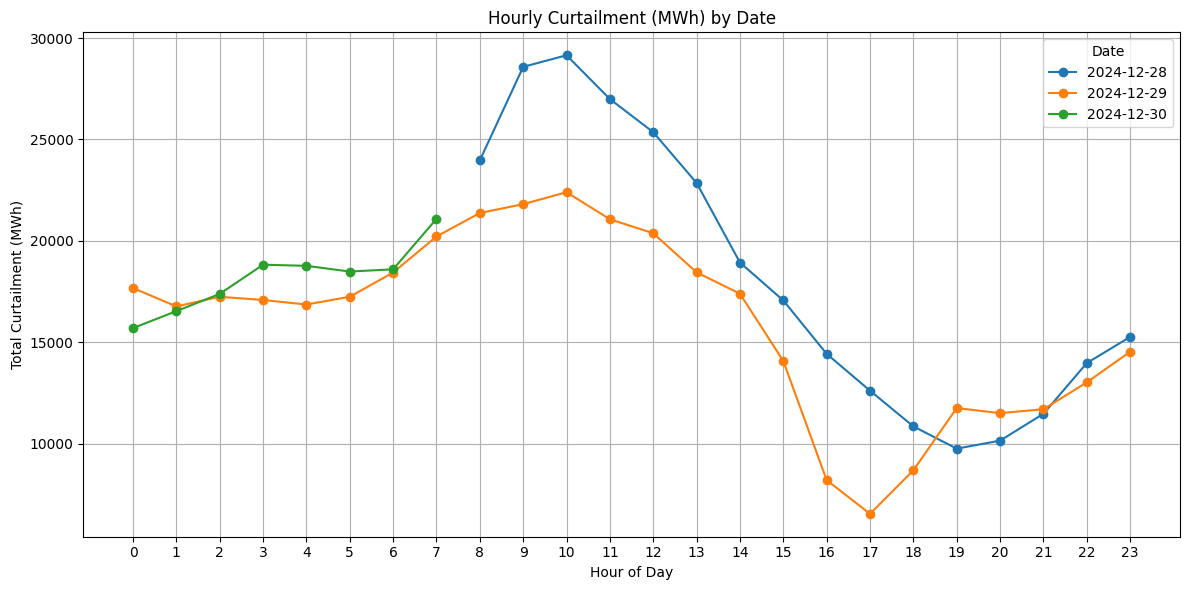

In [15]:
import matplotlib.pyplot as plt

# First, extract date and hour from 'hour' column
hourly_curtailment_full['date'] = hourly_curtailment_full['hour'].dt.date
hourly_curtailment_full['hour_only'] = hourly_curtailment_full['hour'].dt.hour

# Pivot data to have dates as columns and hour_only as index
pivot_df = hourly_curtailment_full.pivot(index='hour_only', columns='date', values='total_curtailment_MWh')

# Plot
plt.figure(figsize=(12,6))
for date in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[date], marker='o', label=str(date))

plt.title('Hourly Curtailment (MWh) by Date')
plt.xlabel('Hour of Day')
plt.ylabel('Total Curtailment (MWh)')
plt.xticks(range(0,24))
plt.legend(title='Date')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Display the table of curtailment events
print("\nCurtailment Frequency Table:\n")
print(curtailment_counts.to_string(index=False))



Curtailment Frequency Table:

          facilityCode  CurtailmentEvents
            ALBANY_WF1                576
            ALINTA_WWF                576
        AMBRISOLAR_PV1                576
       BADGINGARRA_WF1                576
  BLAIRFOX_BEROSRD_WF1                576
  BLAIRFOX_KARAKIN_WF1                576
BLAIRFOX_WESTHILLS_WF3                576
        BREMER_BAY_WF1                576
      DCWL_DENMARK_WF1                576
         FLATROCKS_WF1                576
  INVESTEC_COLLGAR_WF1                576
          GRASMERE_WF1                576
       MWF_MUMBIDA_WF1                576
          KALBARRI_WF1                576
            YANDIN_WF1                576
        WARRADARGE_WF1                576
        NORTHAM_SF_PV1                576
   SKYFRM_MTBARKER_WF1                576
           EDWFMAN_WF1                575
          MERSOLAR_PV1                462
SBSOLAR1_CUNDERDIN_PV1                 27
   GREENOUGH_RIVER_PV1                  2


In [23]:
# Create filtered DataFrame for renewables
df_renewable = merged[merged['facilityCode'].isin(renewable_facilities)].copy()
df_renewable['curtailment'] = df_renewable['quantity'] - df_renewable['clearedQuantity']

# Only keep positive curtailment values
df_curtail = df_renewable[df_renewable['curtailment'] > 0]

# Total bidding intervals per facility
bid_counts = df_renewable.groupby('facilityCode').size().rename('BidIntervals')

# Curtailment event count and stats
curtailment_stats = (
    df_curtail.groupby('facilityCode')
    .agg(
        CurtailmentEvents=('curtailment', 'count'),
        TotalCurtailment_MWh=('curtailment', 'sum'),
        MeanCurtailment_MWh=('curtailment', 'mean')
    )
)

# Combine all info
summary = pd.concat([bid_counts, curtailment_stats], axis=1).fillna(0).astype({'BidIntervals': int, 'CurtailmentEvents': int})

# Sort by curtailment events
summary = summary.sort_values('CurtailmentEvents', ascending=False)

# Display in clean table format
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n🔍 Curtailment Diagnostic Summary:\n")
print(summary.to_string())



🔍 Curtailment Diagnostic Summary:

                        BidIntervals  CurtailmentEvents  TotalCurtailment_MWh  MeanCurtailment_MWh
facilityCode                                                                                      
ALBANY_WF1                       576                576               9159.55                15.90
ALINTA_WWF                       576                576              21865.37                37.96
AMBRISOLAR_PV1                   576                576                440.05                 0.76
BADGINGARRA_WF1                  576                576              31788.37                55.19
BLAIRFOX_BEROSRD_WF1             576                576               2829.34                 4.91
BLAIRFOX_KARAKIN_WF1             576                576               1436.26                 2.49
BLAIRFOX_WESTHILLS_WF3           576                576               1636.22                 2.84
BREMER_BAY_WF1                   576                576                28

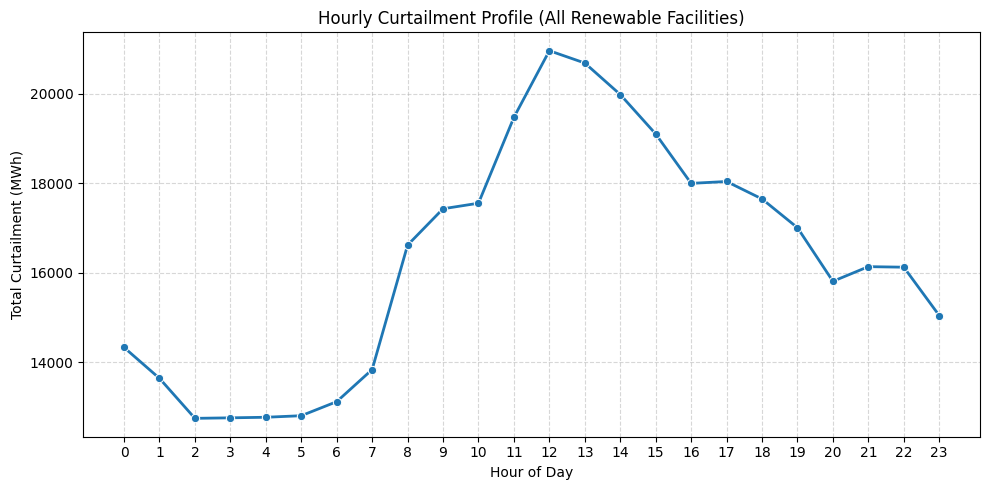

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from dispatchInterval (0-23)
df_renewable['hour'] = df_renewable['dispatchInterval'].dt.hour

# Group by hour and calculate total curtailment
hourly_profile = (
    df_renewable.groupby('hour')['curtailment']
    .sum()
    .reset_index(name='TotalCurtailment_MWh')
)

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_profile, x='hour', y='TotalCurtailment_MWh', marker='o', linewidth=2)
plt.title('Hourly Curtailment Profile (All Renewable Facilities)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Curtailment (MWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pivot: facility vs hour (average curtailment per hour)
pivot = df_renewable.pivot_table(
    values='curtailment',
    index='facilityCode',
    columns='hour',
    aggfunc='mean',
    fill_value=0
)

# Normalize
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot)

# K-Means clustering (you can try different k)
kmeans = KMeans(n_clusters=3, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(pivot_scaled)

# View clustering result
print("\n🔍 Facility Clustering by Hourly Curtailment Pattern:")
print(pivot[['Cluster']])



🔍 Facility Clustering by Hourly Curtailment Pattern:
hour                    Cluster
facilityCode                   
ALBANY_WF1                    0
ALINTA_WWF                    2
AMBRISOLAR_PV1                0
BADGINGARRA_WF1               2
BLAIRFOX_BEROSRD_WF1          0
BLAIRFOX_KARAKIN_WF1          0
BLAIRFOX_WESTHILLS_WF3        0
BREMER_BAY_WF1                0
DCWL_DENMARK_WF1              0
EDWFMAN_WF1                   2
FLATROCKS_WF1                 2
GRASMERE_WF1                  0
GREENOUGH_RIVER_PV1           0
INVESTEC_COLLGAR_WF1          1
KALBARRI_WF1                  0
MERSOLAR_PV1                  2
MWF_MUMBIDA_WF1               2
NORTHAM_SF_PV1                0
SBSOLAR1_CUNDERDIN_PV1        0
SKYFRM_MTBARKER_WF1           0
WARRADARGE_WF1                1
YANDIN_WF1                    1


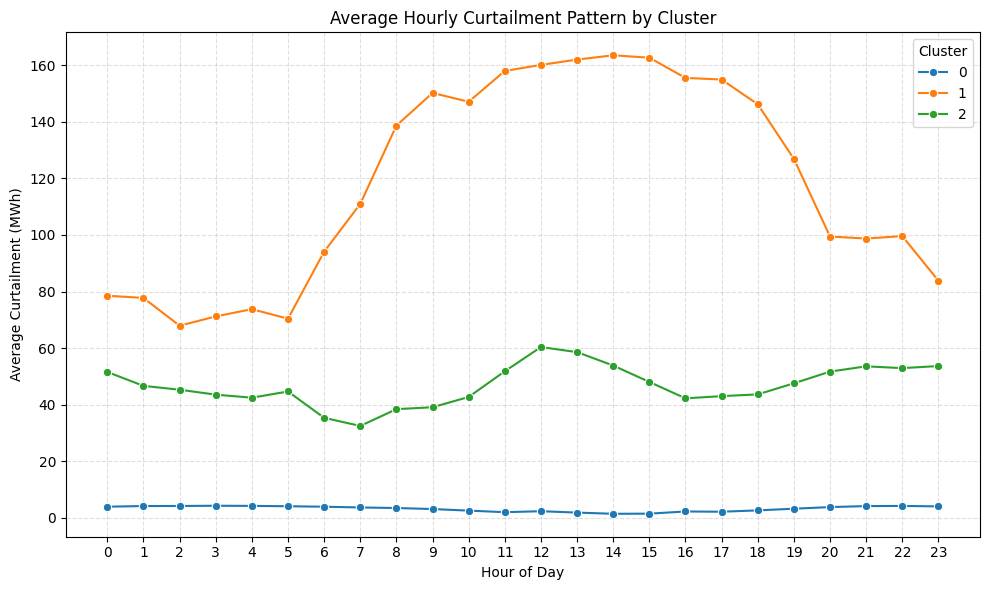

In [27]:
# Add cluster label to the original data
df_renewable = df_renewable.merge(pivot['Cluster'], on='facilityCode')

# Group by cluster and hour to get average curtailment pattern
cluster_hourly = (
    df_renewable
    .groupby(['Cluster', 'hour'])['curtailment']
    .mean()
    .reset_index()
)

# Plot each cluster’s hourly pattern
plt.figure(figsize=(10, 6))
sns.lineplot(data=cluster_hourly, x='hour', y='curtailment', hue='Cluster', palette='tab10', marker='o')
plt.title("Average Hourly Curtailment Pattern by Cluster")
plt.xlabel("Hour of Day")
plt.ylabel("Average Curtailment (MWh)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-3280851758.py:16: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


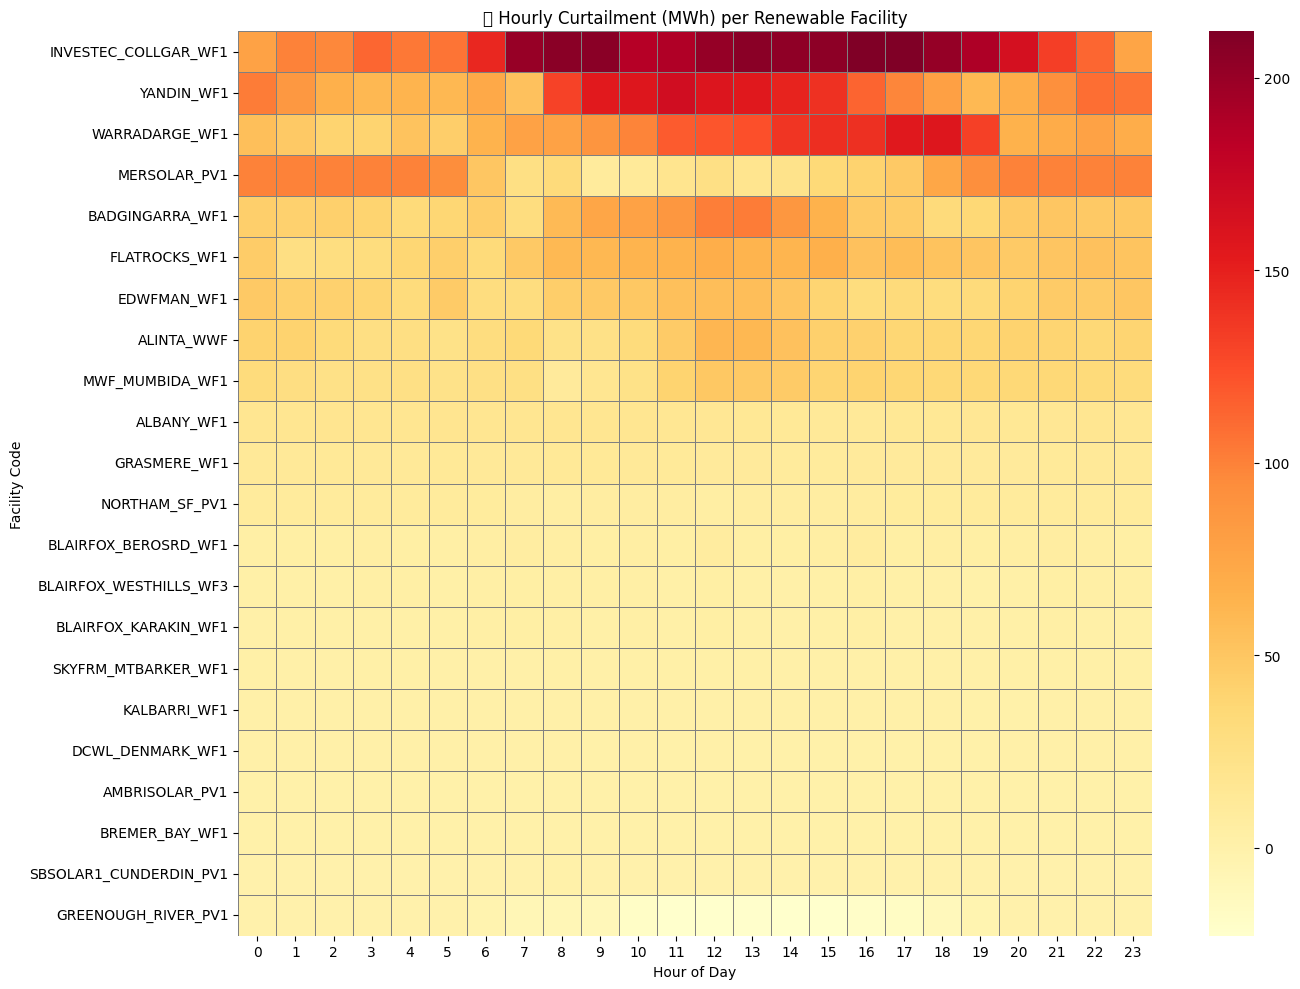

In [30]:
curtailment_matrix = df_renewable.pivot_table(
    index='facilityCode',
    columns='hour',
    values='curtailment',
    aggfunc='mean',
    fill_value=0
)
curtailment_matrix = curtailment_matrix.loc[curtailment_matrix.sum(axis=1).sort_values(ascending=False).index]
plt.figure(figsize=(14, 10))
sns.heatmap(curtailment_matrix, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=False, fmt=".1f")
plt.title("🔆 Hourly Curtailment (MWh) per Renewable Facility")
plt.xlabel("Hour of Day")
plt.ylabel("Facility Code")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
